In [1]:
import pandas as pdb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import listdir
from os.path import isfile, join
import re
import math
import pandas as pd

In [2]:
def get_files_names():

    filenames = listdir()
    return [filename for filename in filenames if filename.endswith(".csv")]

def open_csv(files):
    
    tab = {}
    for file in files:
        tab[file] = pd.read_csv(file, index_col=0)
    return tab

def transformation(df):
    
    df = df.reset_index()
    df = pd.pivot_table(df, columns="index")
    df = df.reset_index()
    df = df.rename(columns={"index":"Np"})
    df["Np"] = pd.to_numeric(df["Np"])
    df = df.sort_values(by=["Np"])
    df = df.reset_index(drop=True)
    return df

In [3]:
df = pd.read_csv( "M3S1R10TP1VTO90VTI25VD70PT100PD3.3K1.csv", index_col=0)
df2 = pd.read_csv("M3S1R10TP1VTO90VTI25VD50PT100PD3.3K1.csv", index_col=0)
df3 = pd.read_csv("M3S1R10TP1VTO90VTI25VD60PT100PD3.3K1.csv", index_col=0)
df4 = pd.read_csv("M3S1R10TP1VTO90VTI25VD80PT100PD3.3K1.csv", index_col=0)
df5 = pd.read_csv("M3S1R10TP1VTO90VTI25VD90PT100PD3.3K1.csv", index_col=0)
df = transformation(df)[4:]
df2 = transformation(df2)[4:]
df3 = transformation(df3)[4:]
df4 = transformation(df4)[4:]
df5 = transformation(df5)[4:]

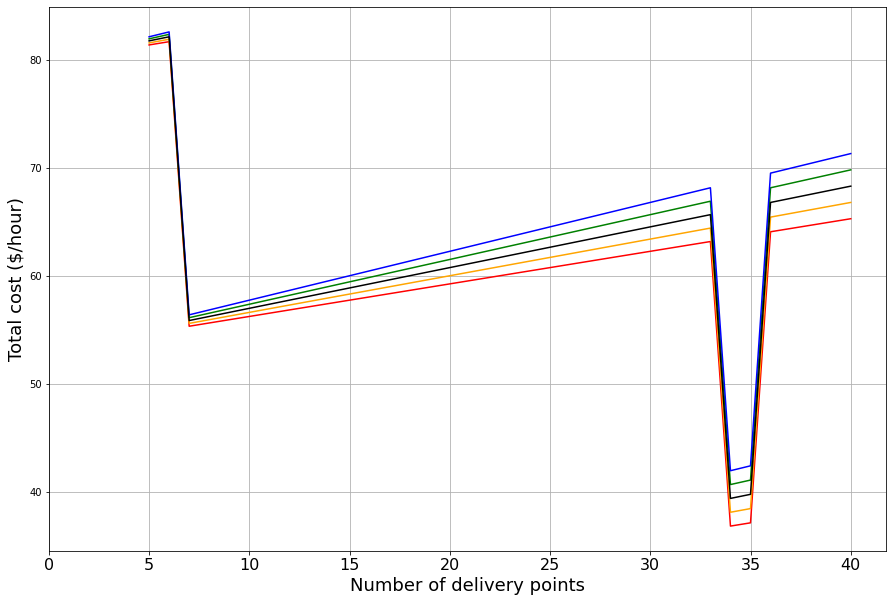

<Figure size 432x288 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(15, 10))
plt.plot("Np", "Ct", data=df2,  color="red", linestyle="-", label="V=50 km/h")
plt.plot("Np", "Ct", data=df3,  color="orange", linestyle="-", label="V=60 km/h")
plt.plot("Np", "Ct", data=df4,  color="green", linestyle="-", label="V=80 km/h")
plt.plot("Np", "Ct", data=df5,  color="blue", linestyle="-", label="V=90 km/h")
plt.plot("Np", "Ct", data=df,  color="black", linestyle="-", label="V=70 km/h (Baseline)")
#plt.yticks([100, 200, 300, 400], fontsize=16)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=16)
plt.xlabel("Number of delivery points", fontsize=18)
plt.ylabel("Total cost ($/hour)", fontsize=18)
#plt.legend(fontsize=16)
plt.grid()
plt.show()
plt.draw()
fig.savefig("M3S1V")